# Tutorial for analysing non-linear time series with a complex network approach


Written as part of a PhD thesis in Physics by Jonathan F. Donges (donges@pik-potsdam.de) at the Potsdam Institute of Climate Impact Research (PIK) and Humboldt University Berlin,

Copyright 2008-2019.

### Recurrence plot as an approach to analyze complex systems

So far, analysis of complex networks in different scientific fields, has been performed by the study of the adjacency matrix $A_{i,j}$. Recent work has been focussing on studying time series using a similar approach by tranforming the time series in a complex network and analyze the phase space and corresponding properties from the **Recurrence plot (RP)**. 

The recurrence matrix can be considered as the adjacency matrix of an undirected, unweighted network. With this approach it is possible to characterise the local and global properties of a network. 
In particular, this approach can be applied (i) to both univariate and multivariate time series (phase space trajectories), (ii) with and without pronounced oscillatory components and (iii) with as well as without embedding. Moreover, similar to traditional Recurrence Quantitative Analysis (RQA), studying network properties for sliding windows in time also allows for coping with non-stationary time series. Consequently, unlike for most of the existing techniques, there are no fundamental restrictions with respect to its practical applicability to arbitrary time series.

For more information regarding background information consult [Norbert Marwan et al,. 2009](https://arxiv.org/abs/0907.3368)
 

### Visualization of a timeseries and its recurrence network

Before we get started, we shall visualize a timeseries based on a three dimensional chaotic oscillator example described by the Lorenz system defined by:

$$\frac{d}{dt}(x,y,z)=(10(y-x),x(28-z)-y,xy-\frac{8}{3}z)$$

The following figures graphically represents the timeseries in phase space and what its respective recurrent plot looks like. 

![Recurrence Plot](img/REcurrencePlot_v2.png)

__(A)__ A state at time *i* (red dot) is recurrent at another time *j* (black dot) when the phase space trajectory visits its close neighborhood (gray circle). This is marked by value 1 in the recurrence matrix at *(i, j)*. States outside of this neighborhood (small red circle) are marked with 0 in the recurrence matrix. __(B)__ Graphical representation of the corresponding recurrence matrix (recurrence plot) and adjacency matrix (modulo main diagonal).

For Literature review and background information see [Reik V Donner et al,. 2010](https://www.researchgate.net/figure/Basic-concepts-beyond-recurrence-plots-and-the-resulting-recurrence-networks-exemplified_fig1_47557940) .


### Correspondence between recurrent network and phase space measurements

The following table shows how some of the correponding characteristics measured from a recurrence network translate into phase space features of the time series.

For more background information consult [Donges et al., 2012](https://www.researchgate.net/publication/225288426_Analytical_framework_for_recurrence_network_analysis_of_time_series)


| Scale | Recurrence Network | Phase space interpretation |
| :--- | :--- | :--- |
| Local | Continuous local $\epsilon$-clustering coefficient *C* <br/>  Continuous $\epsilon$-matching index | Local dimension <br/> Local density gradient | 
| Global | Continuous $\epsilon$-transitivity <br/>  Continuous global $\epsilon$-clustering <br/> | Global dimension <br/> Average local dimension | 





## Calculating properties of a time series by recurrence network analysis using toy example


First we import all necessary packages


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyunicorn.timeseries import RecurrenceNetwork
from pyunicorn.timeseries import RecurrencePlot

Creating a toy nonlinear time series using a logistic map function.

In [17]:
def logistic_map(x0, r, T):
    """
    Returns a time series of length T using the logistic map
    x_(n+1) = r*x_n(1-x_n) at parameter r and using the initial condition x0.

    INPUT: x0 - Initial condition, 0 <= x0 <= 1
            r - Bifurcation parameter, 0 <= r <= 4
            T - length of the desired time series
    """
    #  Initialize timeSeries as python list with initial condition as first entry
    timeSeries = [x0]

    for n in range(T):
        # get current timestep value
        xn = timeSeries[n]
        # calculate next timestep value
        xstep = r * xn * (1 - xn)
        # append new timestep value to timeSeries
        timeSeries.append(xstep)

    return np.array(timeSeries)

Parameters to play with: $r$ as the Bifurcation parameter (should be > 3.6) and $x_0$  being the initial value and $T$ the length of time series. 

In [18]:
#  Parameters of logistic map
r = 3.679  # Bifurcation parameter
x0 = 0.7   # Initial value

#  Length of the time series
T = 150

Text(0, 0.5, '$x_n$')

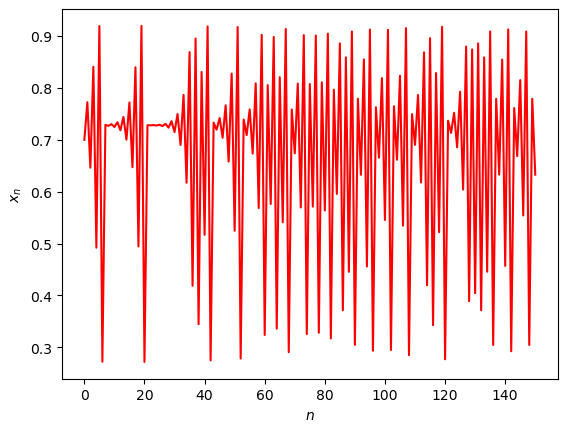

In [19]:
#Generate the timeseries

time_series = logistic_map(x0, r, T)
#  Plot the time series
plt.plot(time_series, "r")
#  You can include LaTex labels...
plt.xlabel("$n$")
plt.ylabel("$x_n$")

Then we create the recurrence plot from the created time series with the RecurrenePlot Class from pyunicorn

Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...


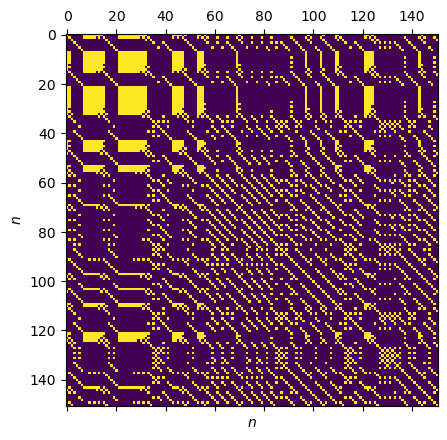

In [41]:
#  Settings for the embedding: no embedding for one-dimensional map
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = "supremum"

EPS = 0.05  # Fixed recurrence threshold

rp = RecurrencePlot(time_series, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

plt.matshow(rp.recurrence_matrix())
plt.xlabel("$n$")
plt.ylabel("$n$")
plt.show()

Some of the main properties of a recurrence plot can be easily extracted by applying the `rqa_summary()` method:

In [42]:
print(rp.rqa_summary())

{'RR': 0.18170255690539888, 'DET': 0.8001002003987974, 'L': 4.3045822101845745, 'LAM': 0.3157894736834481}


Now we can use the recurrence properties, which mimic the phase space properties of the time series to calculate quantitative characteristics of the time series implicitly. We shall distinghuish here between local, intermediate and global properties. To construct the complex network we use the RecurrenceNetwork Class combining the RecurrencePlot and Network (see Class Network from pyunicorn/core) charactistics. For more information on the individual properties see https://iopscience.iop.org/article/10.1088/1367-2630/12/3/033025/meta . 

The main focus will lie on determining the local and global clustering coefficient as well as the network transitivity. 

To create the recurrence network, we first need to calculate the recurrence rate $RR$. Using the toy problem of the logistic map:

In [43]:
#RR gives the percentage of black dots in the recurrence plot (see Figure B).
RR = rp.recurrence_rate()
print(f"RR = {RR}")

rn = RecurrenceNetwork(time_series, dim=DIM, tau=TAU, metric=METRIC,
                       normalize=False, recurrence_rate=RR)

RR = 0.18170255690539888
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


### Local scale network properties

The local scale network properties consider only the direct neighbourhood within a defined $\epsilon$-ball  of a vertex *v*

#### Local clustering coefficient

The local clustering coefficient of a vertex *v*, *C<sub>v</sub>*, characterizes the density of connections in the direct neighbourhood of this vertex in terms of the density of connections between all vertices that are incident with *v*.

We consider the clustering coefficient by Watts and Strogatz:

$$C_v=\frac{2}{k_v(k_v-1)}N^\Delta_v$$

whereby *N<sub>v</sub>* represents the number of closed triangles including vertex *v* and *k<sub>v</sub>* stands for the local recurrence rate around a vertex *v*.

In [44]:
LCC = rn.local_clustering()  #rn being the recurrence network

print("Local clustering coefficients:")
print(LCC)

Calculating local clustering coefficients...
Local clustering coefficients:
[0.77327327 0.68921776 0.75       0.72       0.55555556 1.
 1.         0.89102564 0.89102564 0.83610188 0.89102564 0.83610188
 0.82195122 0.81284607 0.77327327 0.68921776 0.75       0.72
 0.55555556 1.         1.         0.89102564 0.89102564 0.89102564
 0.89102564 0.89102564 0.89102564 0.83610188 0.83391405 0.85017422
 0.80121951 0.79281184 0.72268908 0.72159091 0.61904762 0.67557932
 0.61111111 0.87192118 0.75641026 0.74666667 0.83333333 0.99275362
 0.97802198 0.83610188 0.85       0.83391405 0.76955903 0.7167019
 0.7254902  0.74074074 0.77272727 0.98333333 0.925      0.81078224
 0.78812416 0.75687104 0.6969697  0.74876847 0.71428571 0.87192118
 0.74269006 0.74252874 0.75757576 0.87192118 0.8        0.73809524
 0.74358974 0.98333333 0.88970588 0.75687104 0.6969697  0.74252874
 0.71428571 0.87192118 0.75816993 0.74252874 0.71428571 0.87192118
 0.77205882 0.72643678 0.76923077 0.8994709  0.8128655  0.73333333
 

### Global scale network properties

Global scale network properties take all vertices into account.

#### Global clustering coefficient

The global clustering coefficient is considered as the average value of the clustering coefficient taken over all vertices of a network expressed by:

$$C=\frac{1}{N}\sum_{v=1}^{N}C_v$$

In [46]:
GCC = rn.global_clustering()
print(f"GCC = {GCC}")

GCC = 0.788439574776969


#### Network transitivity

The transivity of a network describes the probability whether from three points *x,y* and *z*, *y* and *z* are closer than $\epsilon$ given they are both closer than $\epsilon$ to *x*. It is described by the $\epsilon$-transivity of a path-connected Lebesgue-measurable subset *S*

$$T(\epsilon)=\frac{\left[\int\int\int_{S}^{}d\mu(z)\Theta(\epsilon-\left\|x-y\right\|)x\Theta(\epsilon-\left\|y-z\right\|)\Theta(\epsilon-\left\|z-x\right\|)\right]}{\left[\int\int\int_{S}^{}d\mu(x)d\mu(y)d\mu(y)\Theta(\epsilon-\left\|x-y\right\|)x\Theta(\epsilon-\left\|z-x\right\|)\right]}$$

In [48]:
T = rn.transitivity()
print(f"T = {T}")

T = 0.7957923848091264


# Calculating properties of a time series by recurrence network analysis using Lorenz attractor example

In this example we will be using a complex chaotic system to calculate recurrence network properties from it: The Lorenz attractor, which is defined by
$$\frac{d}{dt}(x,y,z)=\left(10(y-x)\right(28-z),xy-\frac{8}{3}z)$$

In [49]:
def Lorenz_timeseries(dt=0.01, num_steps=10000, x0=0., y0=1., z0=1.05, s=10., r=28., b=2.667, spinup=100):
   """
   Given:
      dt: length of timestep
      num_steps: number of timesteps
      x0, y0, z0: initial values for timeseries
      s, r, b: parameters defining the lorenz attractor
      spinup: number of spinup-timesteps before storing results to output
   Returns:
      timeseries: numpy array of three dimensional timeseries on Lorenz attractor with length num_steps
   """
   
   # spinup
   for n in range(spinup):
      x0 += (s*(y0 - x0)) * dt
      y0 += (r*x0 - y0 - x0*z0) * dt
      z0 += (x0*y0 - b*z0) * dt

   # initialize timeseries with spun-up initial values
   x = [x0]
   y = [y0]
   z = [z0]

   # calculate timeseries
   for n in range(num_steps-1):
      # get current values
      xn = x[n]
      yn = y[n]
      zn = z[n]
      # calculate next timestep values
      xstep = xn + (s*(yn - xn)) * dt
      ystep = yn + (r*xn - yn - xn*zn) * dt
      zstep = zn + (xn*yn - b*zn) * dt
      # append to timeseries
      x.append(xstep)
      y.append(ystep)
      z.append(zstep)

   timeseries = np.transpose([x,y,z])
   
   return timeseries

Now calculate a timeseries on the Lorenz attractor with the defined function. Try different timesteps, initial values and Lorenz parameters, or just use the default ones defined above.

In [50]:
# calculate timeseries on Lorenz attractor 
Lorenz = Lorenz_timeseries(spinup=100)

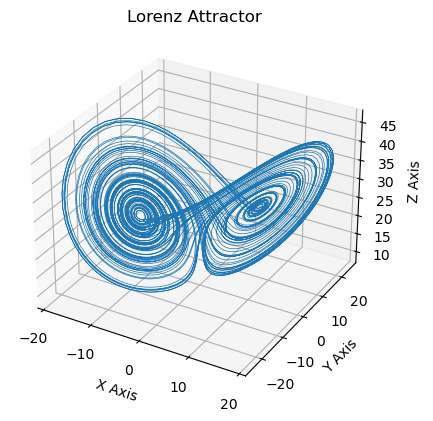

In [51]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(Lorenz[:,0], Lorenz[:,1], Lorenz[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


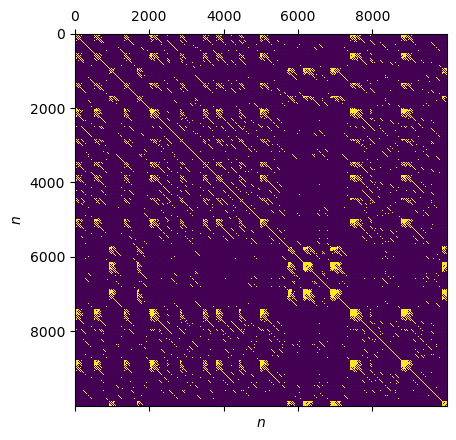

In [52]:
#For the obtained timeseries, calculate recurrence plot for a fixed global recurrence rate of 0.05
Lorenz_rp = RecurrencePlot(Lorenz, metric = "supremum", recurrence_rate=0.05) #Use metric supremum 

#Show plot
plt.matshow(Lorenz_rp.recurrence_matrix())
plt.xlabel("$n$")
plt.ylabel("$n$")
plt.show()

#### Local clustering coefficient

Calculate local clustering coefficient and dimension of generated Lorenz timeseries and visualize result on plot

In [31]:
# Calculate RecurrenceNetwork of generated Lorenz-timeseries
Lorenz_rn = RecurrenceNetwork(Lorenz,  metric = "supremum", recurrence_rate=0.05)

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


In [53]:
# From obtained RecurrenceNetwork calculate local clustering coefficients (LCC)
Lorenz_LCC = Lorenz_rn.local_clustering() 

print(f"LCC = {Lorenz_LCC}")

Calculating local clustering coefficients...
LCC = [0.65332227 0.65165906 0.64570268 ... 0.65980106 0.65624366 0.6570686 ]


From the local clustering coefficient we can calculate the local clustering dimension (LCD) by taking the log of the local clustering coefficient and dividing it by log (3/4)

$$LCD=\frac{log(LCC)}{log(\frac{3}{4})}$$


In [54]:
# Calculate LCD
LCD = np.log10(Lorenz_LCC)/np.log10(3/4)

print(f"LCD = {LCD}")

LCD = [1.47970552 1.48856605 1.52048446 ... 1.44540435 1.46419666 1.45982974]


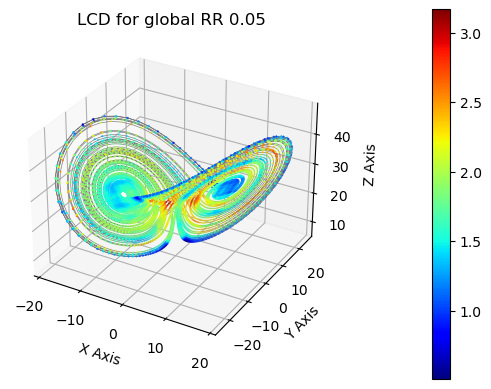

In [80]:
# Plot local clustering dimension on Lorenz attractor
# get colormap
cm = plt.cm.get_cmap('jet')
ax = plt.figure().add_subplot(projection='3d')

# plot underlying trajectory
ax.plot(Lorenz[:, 0], Lorenz[:, 1], Lorenz[:, 2], lw=0.5, color="grey")
# plot LCD 
scat_plot = ax.scatter(Lorenz[:, 0], Lorenz[:, 1], Lorenz[:, 2], lw=0.5, c=LCD, s=1, cmap=cm)
cb = plt.colorbar(scat_plot, pad=0.2)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

ax.set_title("LCD for global RR 0.05")
plt.show()

#### Global clustering coefficient

Here, we can calculate the global clustering coefficient and dimension of the generated Lorenz timeseries and visualize the results on plot

In [55]:
# Apply global_clustering function to stack to get global clustering coefficient (GCC)
GCC = Lorenz_rn.global_clustering()

print(f"GCC = {GCC}")

Calculating global clustering coefficient (C_2)...
GCC = 0.6179359105713065


From the global clustering coefficient we can calculate the global clustering dimension (GCD) by taking the log of the global clustering coefficient and dividing it by log (3/4)

$$GCD=\frac{log(GCC)}{log(\frac{3}{4})}$$

In [56]:
GCD = np.log10(GCC)/np.log10(3/4)
print(f"GCD = {GCD}")

GCD = 1.67327260741976


#### Transitivity

Finally we will calculate the transitivity $T$ and its corresponding dimension $TD$ of the generated Lorenz timeseries and visualize the results on a plot.

In [58]:
# Calculate transitivity from RecurrenceNetwork of our timeseries
Lorenz_T = Lorenz_rn.transitivity() 
print(f"T = {Lorenz_T}")

T = 0.6405742697542526


From the transitivity we can calculate the transitivity dimension $TD$ by taking the log of the transitivity value and dividing it by log (3/4)

$$TD=\frac{log(T)}{log(\frac{3}{4})}$$

In [59]:
TD = np.log10(Lorenz_T)/np.log10(3/4)
print(f"TD = {TD}")

TD = 1.5482028639163619


We can also calculate the transitivity dimension for an array of different thresholds $\epsilon$. We will create a function to do this:

In [12]:
from IPython.display import clear_output

def trans_dim_EPS(timeseries, eps):
    """
    given:
        timeseries: timeseries to calculate transitivity for, given different values of epsilon
        eps: array of values of epsilon to calculate transitivity for
    returns:
        transitivity: numpy array of calculated transitivity for each value of EPS
    """

    trans_dim = []
    it = 0
    its = len(eps)
    for e in eps:
        ## display progress
        # clear previous output
        clear_output(wait=True)
        # print iteration
        it += 1
        print(f"Iteration {it}/{its}: Calculating TD for eps = {e}")
        
        ## do calculations
        # calculate transitivity
        RP = RecurrencePlot(timeseries, threshold=e) #runs ~ 20s
        RR = RP.recurrence_rate()
        RN = RecurrenceNetwork(timeseries, recurrence_rate=RR) # runs ~30s
        trans_e = RN.transitivity()
        # calculate transitivity dimension
        trans_dim_e = (np.log10(trans_e))/np.log10(3/4)
        # append to list
        trans_dim.append(trans_dim_e)

    print("Finished calculating transitivity dimensions.")
    return np.array(trans_dim)

Now we can choose an array of $\epsilon$ values to calculate the transitivity dimensions for. 

NOTE: for the given array the following cell runs around 15 mins.

In [13]:
# define array of epsilon to calculate transitivity dimensions for
EPS = np.arange(0.05, .5, 0.01)

# calculate transitivity for different values of epsilon using above function
# CAUTION: runs around 6 mins
transitivity = trans_dim_EPS(timeseries=Lorenz, eps=EPS) 

Iteration 45/45: Calculating TD for eps = 0.49000000000000005
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating transitivity coefficient (C_1)...
Finished calculating transitivity dimensions


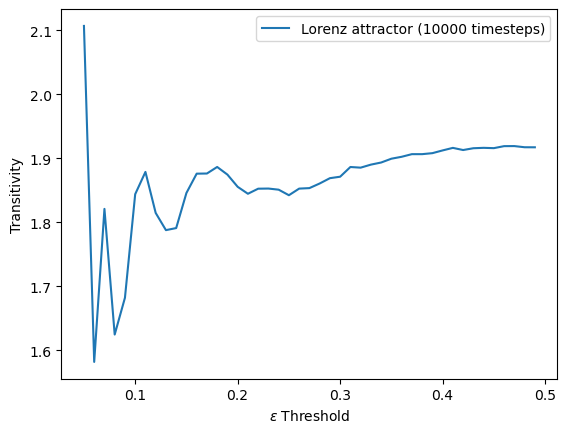

In [64]:
# Print resulting values
#print("Calculated Transitivity:")
#print(transitivity)

# Plot series
plt.plot(EPS, transitivity, label= "Lorenz attractor (10000 timesteps)") 
plt.xlabel('$\epsilon$ Threshold')
plt.ylabel('Transitivity')
plt.legend(loc = "upper right")
plt.show()